In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Clustering

Usually used for Market and Image segmentation. 

Used for exploring data and identifying patters.

Unsupervized data, since the data is not labeled

## Types of Clustering

-   Flat: There is no priorities/hierarchies (Ex: K_Means)
        
-   Hierarchical: There are clusters withins clusters, thus, an hierarchy (Example: Taxanomy on the Animal Kingdom, usually represented by a Dendogram)

        Aglomerative: Bottom-up (Easier to solve mathematically)
        Divisive: Top-down

! Dendograms can get too complex if there is a lot of data

## K-Means


1- Choose the number of clusters

2- Specify cluster seeds

3- assign each point to a centroid

4- Adjust the centroids


Pros:

-   Simple to understand and implement
-   Fast to cluster

Cons:

-   We need to choose the number of clusters
-   Depending on yoiur innicial seeds, the clusters will not be very logical, or appropriate to your data
-   Sensitive to outliers (preferably should be removed prior to clustering)
-   Since the Euclidian distance is used, the clusters tend to be always spherical

### Standardization

    When should we standardize?

The objective of Standardizing is to reduce the weight on higher variables, and increase on lower ones

The smaller the difference between 2 values, the more likely it is for them to be clustered

The greater the difference, the greater the "importance" or "impact" of this variable on the cluster


    ! The data should be analized to evaluate if some variable should receive more weight than others

In [43]:
data = pd.read_csv('db/3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


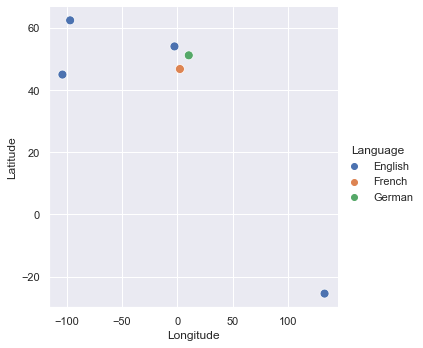

In [44]:
sns.set_theme()
sns.relplot(data=data, x='Longitude', y='Latitude',
            hue='Language',
            s=80)

Mapping the data

In [45]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped["Language"].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Selecting the Features

DataFrame.iloc -> slices the data frama, given rows and columns to be kept

In [46]:
x= data_mapped.iloc[ : ,1:4] #selecting all rows from the 3 last columns: 'Latitude', 'Longitude' and 'Language'
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering

How to choose the number of Clusters? -> Elbow Method

We have to look foward to:

Minimizin the distances between point inside the same Cluster and

Maximize the distances between clusters

    To calculate this we need 2 pieces of information:

-   WCSS: Within-Cluster sum of Squares
-   Number of Clusters

Plotting a graph with this information, the optimal number of clusters will be the number before the line starts to be continuous, the "elbow"

In [47]:
wcss = [] #creating a list for calculating the WCSS

#creating a for loop to calculate the WCSS for each number of clusters 
#(the total number of clusters possible will be equal to the number of lines on the data frame)

for i in range(1,7): 
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_i = kmeans.inertia_ # function that calculates the wcss
    wcss.append(wcss_i)

wcss


[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Plotting the WCSS

<AxesSubplot: >

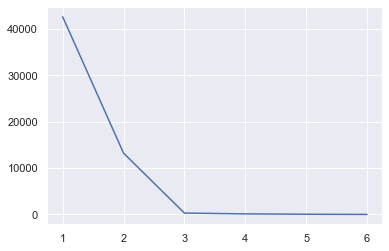

In [48]:
clusters_no = range(1,7)

sns.lineplot(x=clusters_no, y=wcss)

Based on the graph above we can see the optimal number of clusters is 3

In [49]:
kmeans = KMeans(3) #inicializing the object, where 2 is the number of clusters here

In [50]:
kmeans.fit(x) #the fit method will apply the KMeans to the data contained in 'x'

KMeans(n_clusters=3)

In [51]:
#fit_predict returns an array with the identified clusters

identified_clusters = kmeans.fit_predict(x) 
identified_clusters 

array([2, 2, 0, 0, 0, 1])

DataFrame with the results

In [52]:
df_clusters = data_mapped.copy()
df_clusters['Clusters'] = identified_clusters #adding a new colums with the identified clusters
df_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,2
1,Canada,62.40,-96.80,0,2
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


Ploting the results

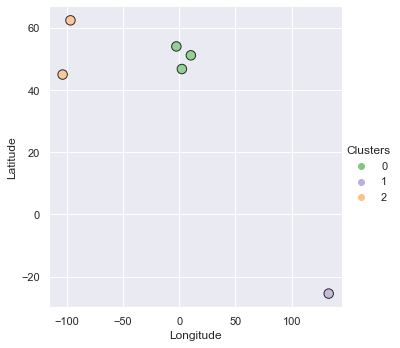

In [53]:
sns.relplot(data=df_clusters,x='Longitude',y='Latitude',
            hue='Clusters',
            s=90, palette='Accent', edgecolor='black',linewidth=1, alpha=0.8) 
#'s' => marker's size 
#'palette' => color pallet used
#'edgecolor' => edge of the markers
#'linewidth' => width of the marker's border
#'alpha' => transparency



Dendogram / Heatmap

For this it is better to use the scaled data on the graoh as well, so the similarities will be more visible

In [54]:
data1 = pd.read_csv('db/Country clusters standardized copy.csv', index_col='Country') #colum "Country" will be the index
data1

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [57]:
scaled_df = data1.copy()
scaled_df = data1.drop(['Language'],axis=1)

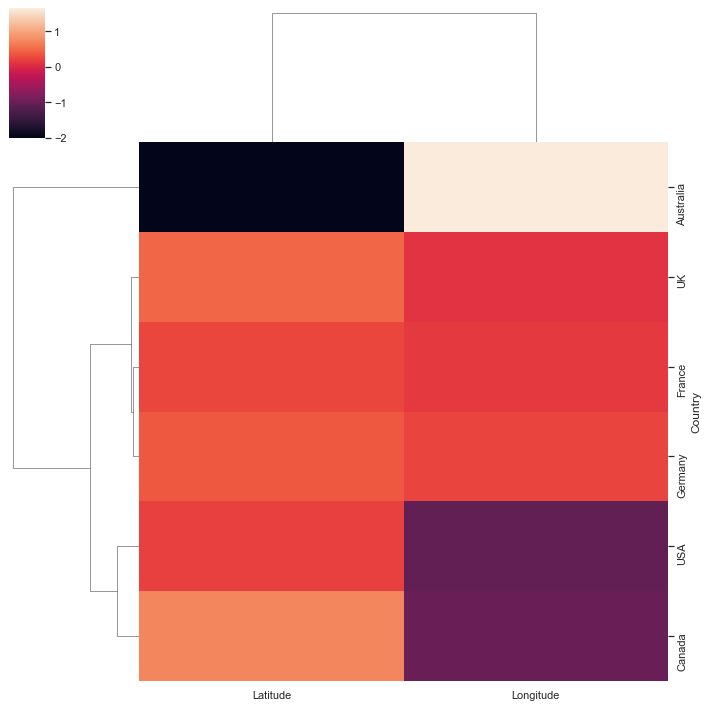

In [58]:
sns.clustermap(scaled_df)